# Traitement des données W43-MM1 en dcn

In [1]:
%pylab inline
from astropy.io import fits
import aplpy
from pywavan import fbm2d, powspec, fan_trans
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


***
# Verification des données enregistré

In [2]:
im_g = np.load("/user/workdir/soldanof/data/dcn/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/dcn/coh.npy")

Text(0.5, 1.0, 'Coherent')

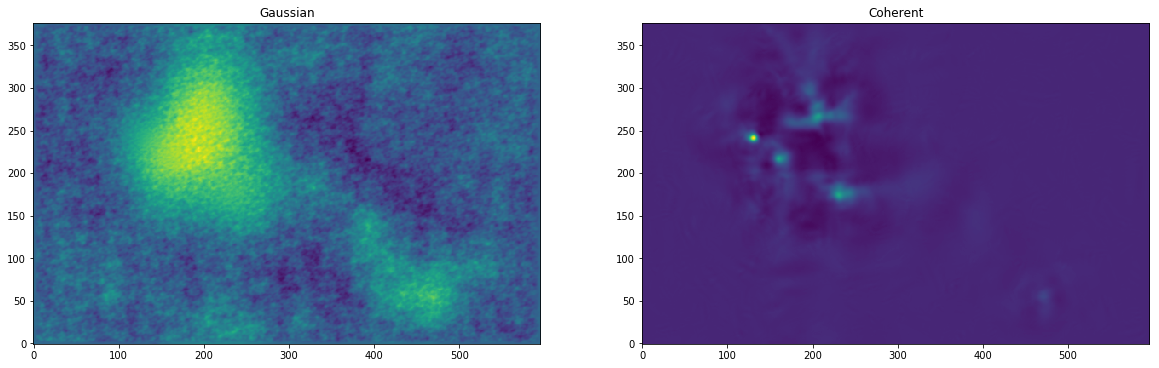

In [4]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_g[15].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[15].real,origin="lower")
title('Coherent')

***
4 image de la partie cohérente à différente partie du cube de donnée

Text(0.5, 1.0, 'canal 40')

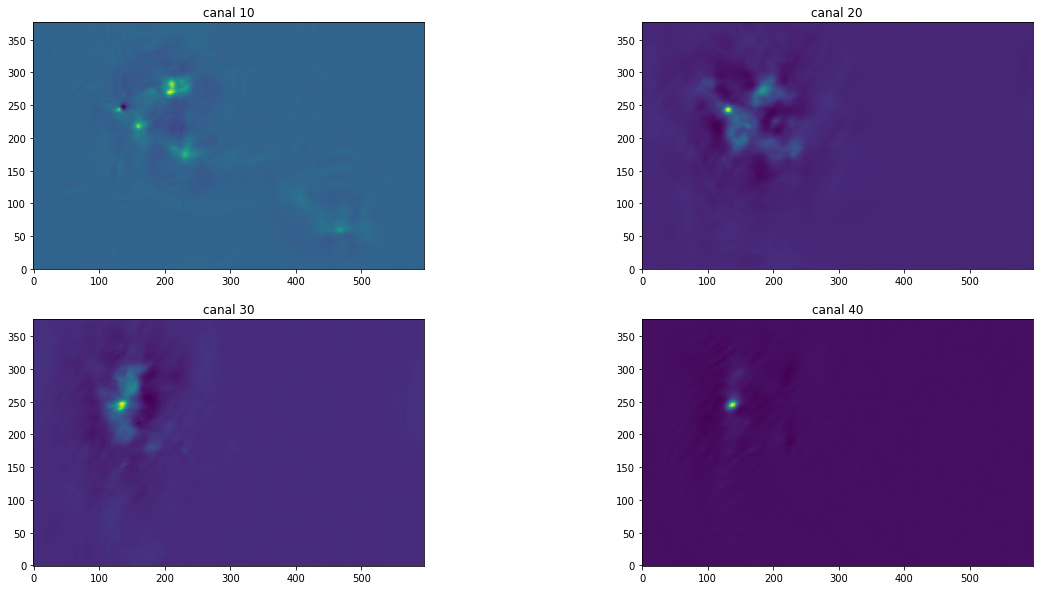

In [130]:
figure(figsize=(20,10))

subplot(2,2,1)
imshow(im_ng[10].real,origin="lower")
title('canal 10')

subplot(2,2,2)
imshow(im_ng[20].real,origin="lower")
title('canal 20')

subplot(2,2,3)
imshow(im_ng[30].real,origin="lower")
title('canal 30')

subplot(2,2,4)
imshow(im_ng[40].real,origin="lower")
title('canal 40')

***
# Transformation des données en fichier fits

In [25]:
HDU = fits.open("/user/workdir/soldanof/ALMA/dcn-7-12m-contsub_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [7]:
fits.writeto("/user/workdir/soldanof/data/dcn/ng.fits",im_ng.real, header) 

In [8]:
fits.writeto("/user/workdir/soldanof/data/dcn/gau.fits",im_g.real, header) 

***
# Traitement des fichier créé

Trace d'une image

INFO: Auto-setting vmin to -3.078e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.182e-02 [aplpy.core]


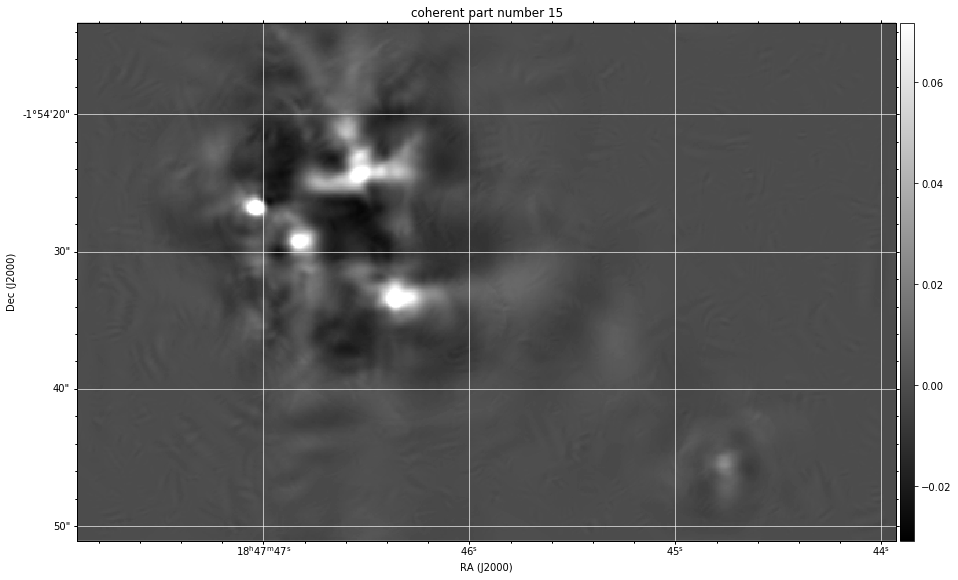

In [9]:
fig_all = plt.figure(1, figsize=(15,15))
nbr = 15
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/dcn/ng.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part number {}".format(nbr))

INFO: Auto-setting vmin to -1.667e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.042e-02 [aplpy.core]


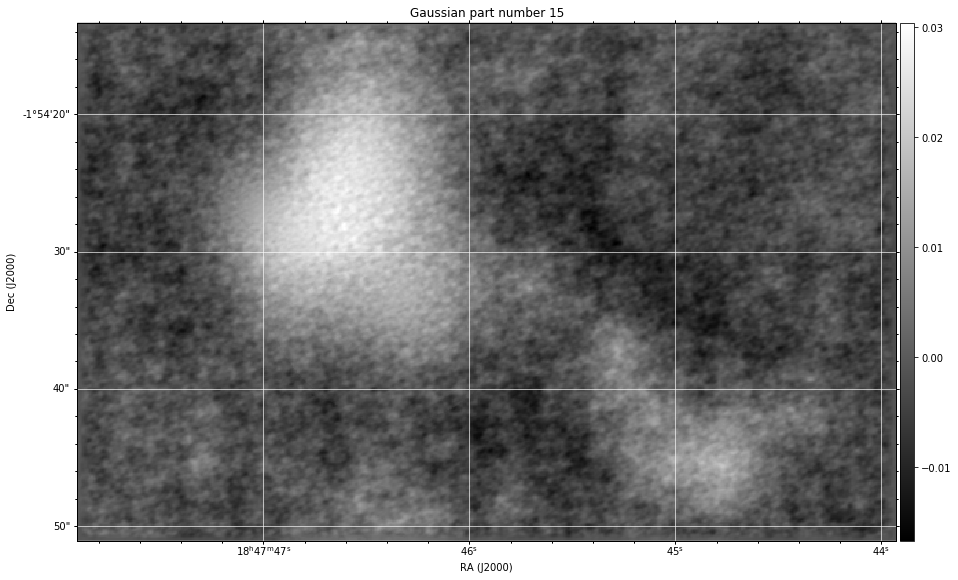

In [10]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/dcn/gau.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("Gaussian part number {}".format(nbr))

***
Trace Freq en fonction de Ra pour la partie gaussienne et la partie cohérente

INFO: Auto-setting vmin to -1.373e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.482e-02 [aplpy.core]


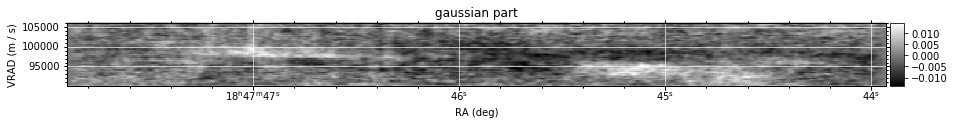

In [11]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/dcn/gau.fits",figure=fig_all,dimensions=[0,2],slices=[100])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("gaussian part")

INFO: Auto-setting vmin to -1.319e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.841e-03 [aplpy.core]


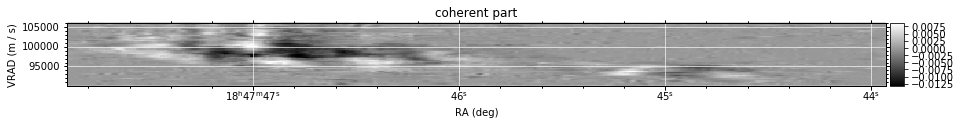

In [12]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/dcn/ng.fits",figure=fig_all,dimensions=[0,2],slices=[100])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part")

***
# creation carte intégré (moment 0)

In [13]:
im_ng.shape

(46, 377, 596)

In [127]:
im_ng_int = np.sum(im_ng,axis=0)

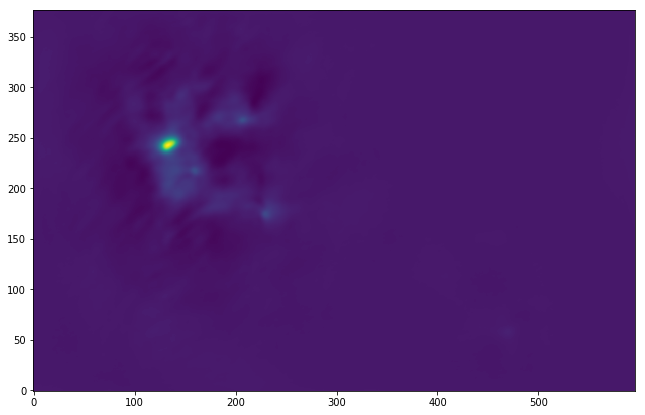

In [128]:
imshow(im_ng_int.real,origin="lower")

In [123]:
im_tot_int = np.sum(cube,axis=0)

Text(0.5, 1.0, 'moment 0 total')

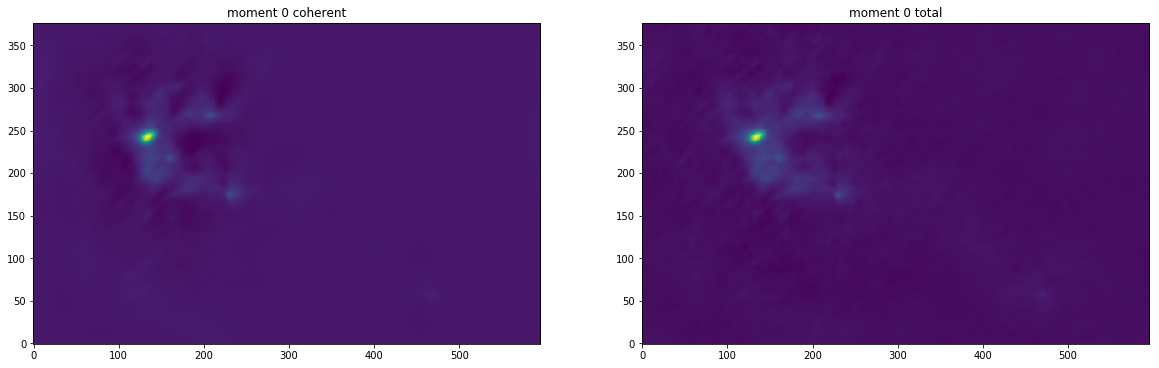

In [129]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_ng_int.real,origin="lower")
title('moment 0 coherent')

subplot(1,2,2)
imshow(im_tot_int.real,origin="lower")
title('moment 0 total') 

Text(0.5, 1.0, 'moment 0 total')

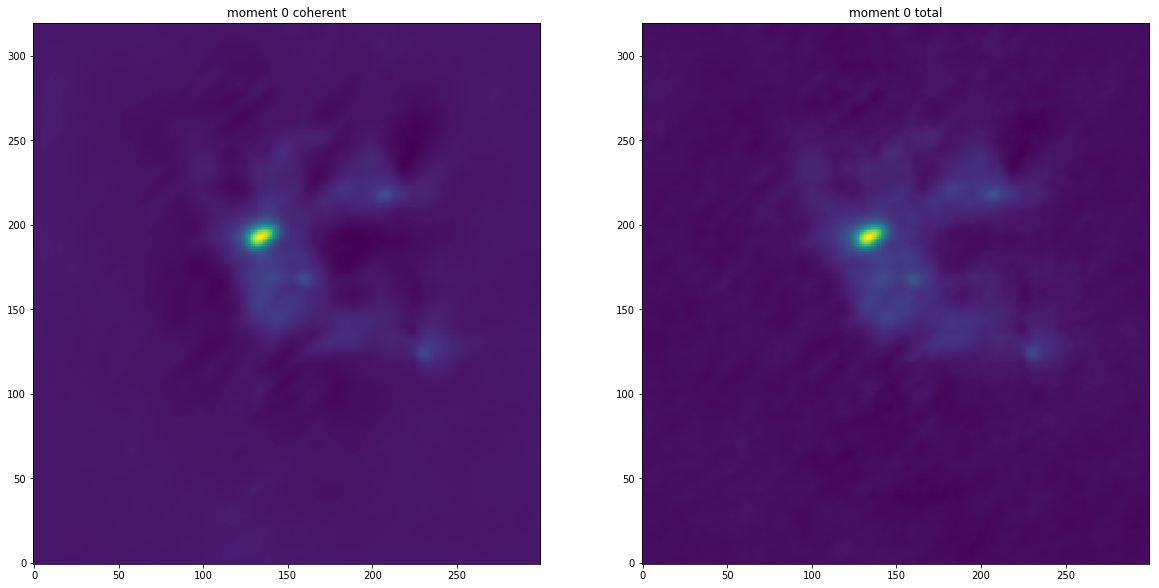

In [18]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_ng_int.real[50:370,0:300],origin="lower")
title('moment 0 coherent')

subplot(1,2,2)
imshow(im_tot_int.real[50:370,0:300],origin="lower")
title('moment 0 total') 

In [19]:
header_t = header
header_t['NAXIS3'] = 1
fits.writeto("/user/workdir/soldanof/data/dcn/ng_t.fits",im_ng_int.real, header_t) 

***

In [111]:
filname = "/user/workdir/soldanof/ALMA/dcn-7-12m-contsub_cut.fits"
HDU = fits.open(filname)
cube = HDU[0].data
header = HDU[0].header

In [125]:
im_g = np.load("/user/workdir/soldanof/data/dcn/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/dcn/coh.npy")

In [126]:
N = header['NAXIS3']
for i in range(N):
    moy = cube[i,:,:].mean()
    im_ng[i,:,:] = im_ng[i,:,:]+moy
    im_g[i,:,:] = im_g[i,:,:] + moy

In [114]:
fits.writeto("/user/workdir/soldanof/data/dcn/ng_mean.fits",im_ng.real, header) 

In [119]:
im_ng[im_ng<0]=0

In [ ]:
fits.writeto("/user/homedir/soldanof/ng_mean_pos.fits",im_ng.real, header) 

***
# Traitement des donnée du spectre de puissance

In [52]:
t = np.load("/user/workdir/soldanof/data/dcn/s1at.npy")
g = np.load("/user/workdir/soldanof/data/dcn/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/dcn/s1ang.npy")
w_k = np.load("/user/workdir/soldanof/data/dcn/wave_k.npy")

Fonction de trace du spectre de puissance

In [21]:
def affiche(n) :
    plt.plot(w_k, t[n],label="total")
    plt.plot(w_k, g[n],"o",label="gaussian")
    plt.plot(w_k, ng[n],"x",label="non gaussian")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(n)
    plt.legend()

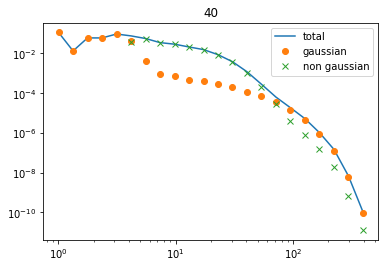

In [53]:
affiche(40)

Text(0.5, 1.0, '40')

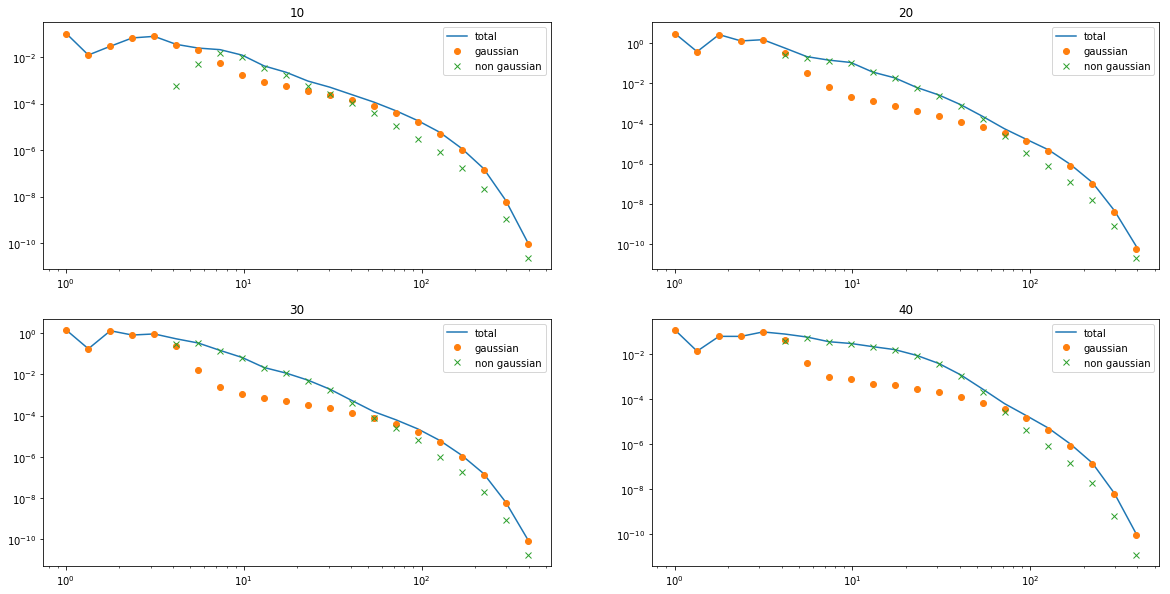

In [54]:

figure(figsize=(20,10))

subplot(2,2,1)
affiche(10)
title('10')

subplot(2,2,2)
affiche(20)
title('20')

subplot(2,2,3)
affiche(30)
title('30')

subplot(2,2,4)
affiche(40)
title('40')

***
# Représentation des 4 premier coeur

In [80]:
from pvextractor import Path
from pvextractor import extract_pv_slice
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic

In [87]:
filname = "/user/workdir/soldanof/data/dcn/ng.fits"
HDU = fits.open(filname)
cube = HDU[0].data
header = HDU[0].header

In [88]:
w = wcs.WCS(header)

if w.wcs.has_crota() == True:
    del header['CROTA1']
    del header['CROTA2']


w = wcs.WCS(header)

In [93]:
c1 = SkyCoord('18:47:47.02 -1:54:26.86', unit=(u.hourangle, u.deg))
sky1 = w.world_to_pixel(c1,90249.99999902* u.m / u.s)[0:2]

c2 = SkyCoord('18:47:46.84 -1:54:29.30', unit=(u.hourangle, u.deg))
sky2 = w.world_to_pixel(c2,90249.99999902* u.m / u.s)[0:2]

c3 = SkyCoord('18:47:46.37 -1:54:33.41', unit=(u.hourangle, u.deg))
sky3 = w.world_to_pixel(c3,90249.99999902* u.m / u.s)[0:2]

c4 = SkyCoord('18:47:46.98 -1:54:26.42', unit=(u.hourangle, u.deg))
sky4 = w.world_to_pixel(c4,90249.99999902* u.m / u.s)[0:2]

In [90]:
w.pixel_to_world(20,2,0)

[<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
     (281.94903072, -1.9141111)>, <Quantity 90249.99999902 m / s>]

Text(0.5, 1.0, 'moment 0 coherent')

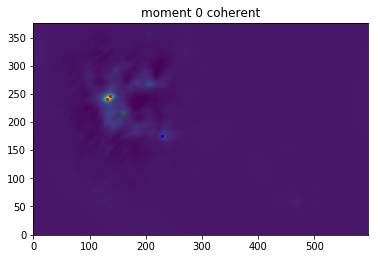

In [95]:
imshow(im_ng_int.real,origin="lower")
plt.scatter(int(sky4[0]), int(sky4[1]), s=5, c='r', marker='o')
plt.scatter(int(sky3[0]), int(sky3[1]), s=5, c='b', marker='o')
plt.scatter(int(sky2[0]), int(sky2[1]), s=5, c='g', marker='o')
plt.scatter(int(sky1[0]), int(sky1[1]), s=5, c='r', marker='o')
title('moment 0 coherent')

***
# Corection du beam du télescope

In [28]:
from pywavan import apodize, padding, gauss_beam

In [61]:
#Resolution in arcmin
reso = header['CDELT2'] * 60.

im = cube[15]
#im = im_g[50]

#Apodization
imzm = im - np.mean(im)
tapper = apodize(im.shape[0],im.shape[1],0.98)
imt = imzm *tapper
nsize = 1024
imr = padding(imt, 377, 596)


#Fourier Powre Spectrum
tab_k_im, spec_k_im = powspec(imr, reso = reso)

In [62]:
tab_k_im.shape

(296,)

In [63]:
reso = header['CDELT2'] * 60.

In [64]:
#Noise evaluation
noise = np.mean(spec_k_im[(tab_k_im > 200.) & (tab_k_im < 300.)])

In [65]:
noise

3.887456425426962e-08

In [66]:
#Beam Power spectrum
reso = header['CDELT2'] * 60.
FWHM = 0.48 / (60*reso)  #Beam size
#header['BMAJ'] = 18.2 / 3600.
#header['BMIN'] = 18.2 / 3600.
#header['BPA'] = 0.
beam = gauss_beam(FWHM,377, 596,FWHM=True)
tab_k_im, spec_beam = powspec(beam, reso=reso)
spec_beamn = spec_beam/spec_beam[0]  #Spectrum normalisation

In [67]:
#Power spectrum fit
limites = np.where((tab_k_im >= tab_k_im[3]) & (tab_k_im < 20.0))

A = np.polyfit(np.log(tab_k_im[limites]), np.log((spec_k_im[limites]-noise)/spec_beamn[limites]),deg=1)
fit_im = np.exp(A[1])*tab_k_im**A[0]
print('Pywavan fBm Power fit')
print('A, Gamma = ', np.exp(A[1]), A[0])

Pywavan fBm Power fit
A, Gamma =  1.739228411125976 -1.841455838494772


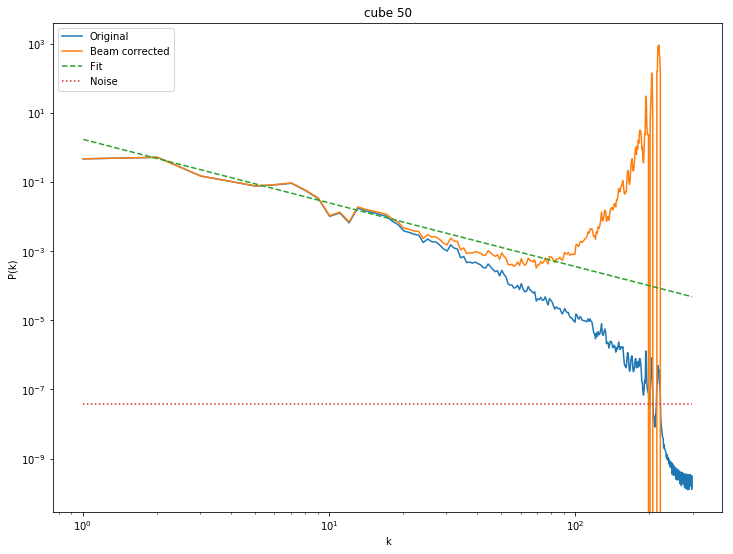

In [68]:
figure(figsize=(12,9))
plot(tab_k_im, spec_k_im, label='Original')
plot(tab_k_im, (spec_k_im-noise)/spec_beamn, label='Beam corrected')
plot(tab_k_im, fit_im, linestyle='--', label='Fit')
plot([tab_k_im[0],tab_k_im[-1]], [noise,noise], linestyle=':', label='Noise')
xscale('log')
yscale('log')
xlabel('k')
ylabel('P(k)')
title('cube 50')
legend()

In [ ]:
S1aB[5]

In [96]:
reso = header['CDELT2'] * 60.
FWHM = 0.4 / (60*reso)  #Beam size
beam = gauss_beam(FWHM,596,377, FWHM=True)
wtB, S11aB, wav_k, S1aB, qB = fan_trans(beam, reso=reso, q=0, angular=False)
del wtB, S11aB, qB

100%|██████████| 22/22 [00:20<00:00,  1.05it/s]


In [97]:
#Normalisation
S1aBn = S1aB/S1aB[4]
S1aBn[:3] = 1.

Text(0.5, 1.0, 'Beam')

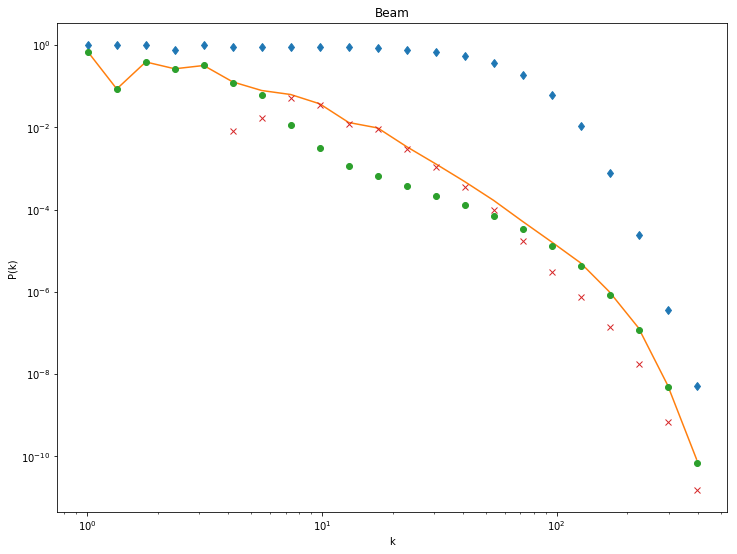

In [98]:
figure(figsize=(12,9))
n=15
plot(wav_k,  S1aBn,'d', label='Fourier')
plt.plot(w_k, t[n],label="total")
plt.plot(w_k, g[n],"o",label="gaussian")
plt.plot(w_k, ng[n],"x",label="non gaussian")
plt.xscale("log")
plt.yscale("log")
xscale('log')
yscale('log')
xlabel('k')
ylabel('P(k)')
title('Beam')

In [99]:
#Power spectrum fit
num=15
Ag = np.polyfit(np.log(w_k[7:17]), np.log((g[num][7:17]-noise)/S1aBn[7:17]),deg=1)
fitG = np.exp(Ag[1])*wav_k**Ag[0]
print('Gaussian Power fit')
print('A, Gamma = ', np.exp(Ag[1]), Ag[0])

Gaussian Power fit
A, Gamma =  0.0916132525299853 -1.5148465302952954


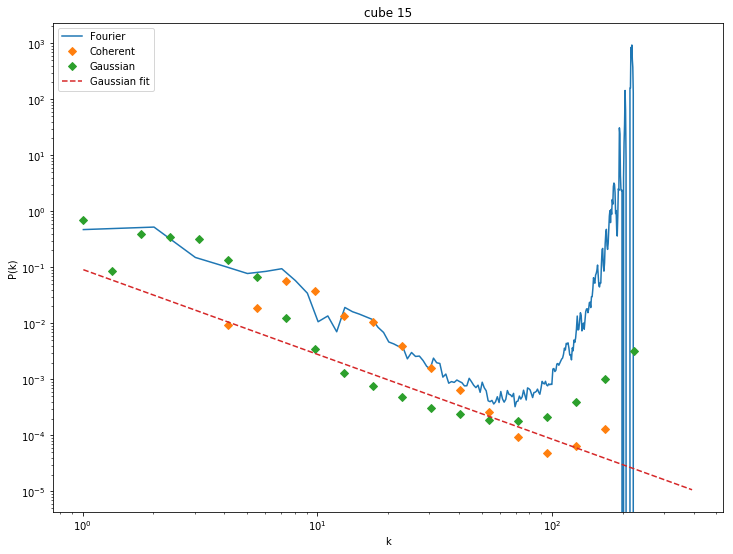

In [100]:
figure(figsize=(12,9))
num=15
#plot(tab_k_im, spec_k_im, label='Fourier')
#plot(wav_k, S1a[1,:], 'D', label='Coherent')
#plot(wav_k, S1a[2,:], 'D', label='Gaussian')
plot(tab_k_im, (spec_k_im-noise)/spec_beamn, label='Fourier')
plot(wav_k, (ng[num]-noise)/S1aBn, 'D', label='Coherent')
plot(wav_k, (g[num]-noise)/S1aBn, 'D', label='Gaussian')
plot(wav_k, fitG, '--', label='Gaussian fit')
xscale('log')
yscale('log')
xlabel('k')
ylabel('P(k)')
title('cube 15')
legend()
#ylim(10**-10,1)